In [1]:
# Importing Required Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,learning_curve
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score,accuracy_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import learning_curve

In [4]:
# Loading dataset as pandas dataframe
customer_churn = pd.read_csv("Telco_Customer_Churn.csv")

The data set includes information about:

Customers who left within the last month – the column is called Churn

Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

Customer account information - how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

Demographic info about customers – gender, are they senior citizen and if they have partners and dependents

In [5]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We can note that TotalCharges are numeric data but dataframe is treating it as object
and replace the 1 and 0 to Yes and No in SeniorCitizen column

# Data Transformation

In [6]:
# Converting TotalCharges to Numeric
customer_churn['TotalCharges'] = pd.to_numeric(customer_churn.TotalCharges, errors='coerce')

# Converting Senior Citizen column for EDA
customer_churn['SeniorCitizen']=customer_churn['SeniorCitizen'].map({0:"No",1:"Yes"})

customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Dropping customer ID as it is not required for our objective
customer_churn= customer_churn.drop(['customerID'], axis = 1)

In [8]:
customer_churn.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [9]:
# Checking for null values 
customer_churn.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
customer_churn[np.isnan(customer_churn['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,No,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


We can note that the rows with no total charges values have 0 tenure means customer left the telecom service immediately after joining it, we can drop these columns

In [11]:
customer_churn.dropna(inplace=True)
customer_churn.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
customer_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Exploratory Data Analysis (EDA)

In [13]:
customer_churn.describe(include='all')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032,7032,7032,7032,7032.000000,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032.000000,7032.000000,7032
unique,2,2,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN,2
top,Male,No,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,3549,5890,3639,4933,NaN,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,NaN,NaN,5163
mean,NaN,NaN,NaN,NaN,32.421786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.798208,2283.300441,NaN
std,NaN,NaN,NaN,NaN,24.545260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.085974,2266.771362,NaN
min,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.587500,401.450000,NaN
50%,NaN,NaN,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,NaN
75%,NaN,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.862500,3794.737500,NaN


C:\Users\aksha\AppData\Local\Temp\ipykernel_45224\1555906911.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customer_churn['MonthlyCharges'])


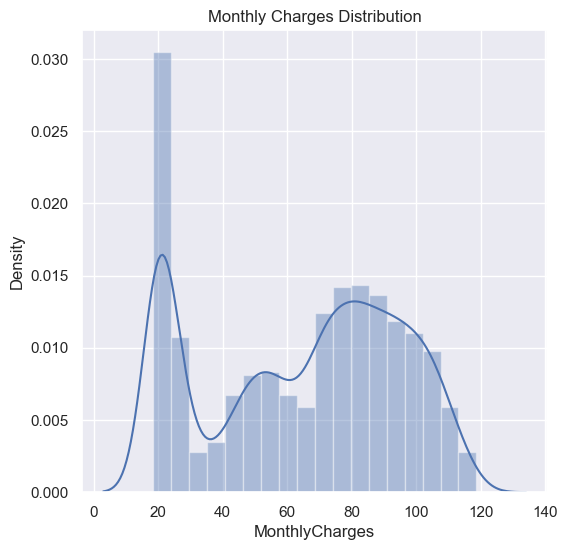

In [14]:
# Distribution of quantitative features
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(customer_churn['MonthlyCharges'])
plt.title("Monthly Charges Distribution")
plt.show()

Insights: The distribution is multimodal (multiple peaks), which could reflect different customer plans or tiers (e.g., basic, premium).

Most customers are concentrated in the 20–120 range, with very few below 10 or above 130.

The peaks suggest common pricing points that may align with specific service bundles or promotions

C:\Users\aksha\AppData\Local\Temp\ipykernel_45224\4218535986.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customer_churn['tenure'])


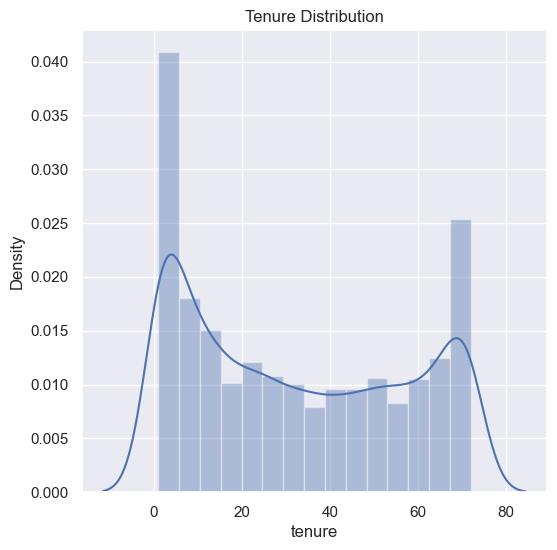

In [15]:

plt.figure(figsize=(6,6))
sns.distplot(customer_churn['tenure'])
plt.title("Tenure Distribution")
plt.show()

Insights: High Attrition Early On: The spike at 0 months may signal early churn—customers leaving soon after signing up. Investigate reasons (e.g., poor onboarding, pricing mismatch).

Contract-Driven Behavior: The periodic peaks suggest customers are on fixed-term contracts (e.g., 12, 24, or 36 months).

Retention Opportunities: The drop-off after peaks (e.g., at 24 months) could indicate customers not renewing. Target these points for retention efforts.

C:\Users\aksha\AppData\Local\Temp\ipykernel_45224\1418607596.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customer_churn['TotalCharges'])


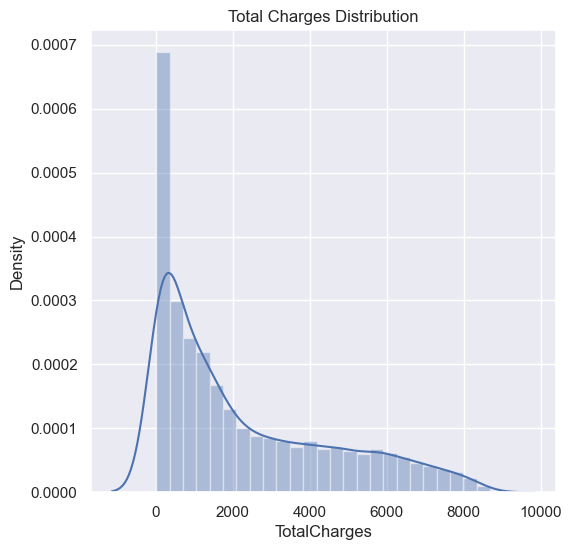

In [16]:

plt.figure(figsize=(6,6))
sns.distplot(customer_churn['TotalCharges'])
plt.title("Total Charges Distribution")
plt.show()

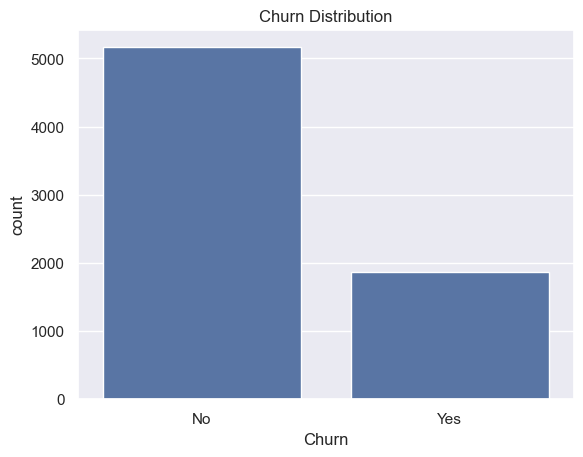

In [17]:
# Plot churn count
sns.countplot(x='Churn', data=customer_churn)
plt.title("Churn Distribution")
customer_churn['Churn'].value_counts(normalize=True) * 100
plt.show()

In [18]:
customer_churn['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

Dataset is imbalanced

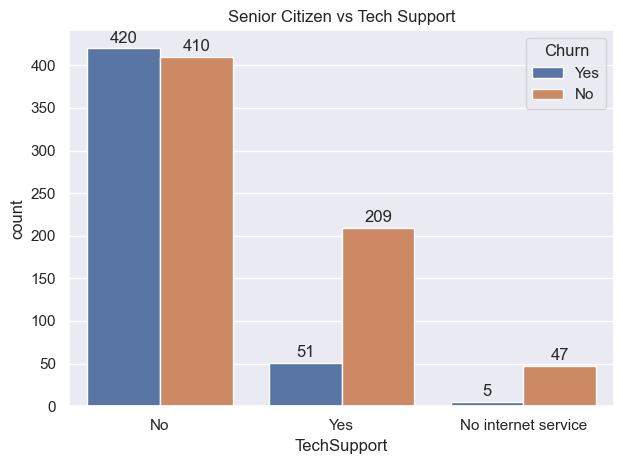

In [19]:
df_seniors = customer_churn[customer_churn['SeniorCitizen'] == 'Yes']
ax= sns.countplot(x='TechSupport', hue='Churn', data=df_seniors)
plt.title("Senior Citizen vs Tech Support")
# Add data labels
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=2)

# Adjust layout to prevent overlapping labels
plt.tight_layout()
plt.show()

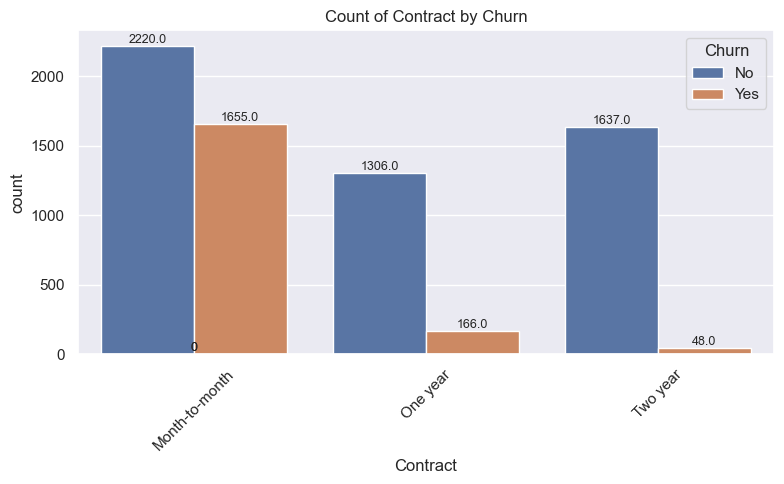

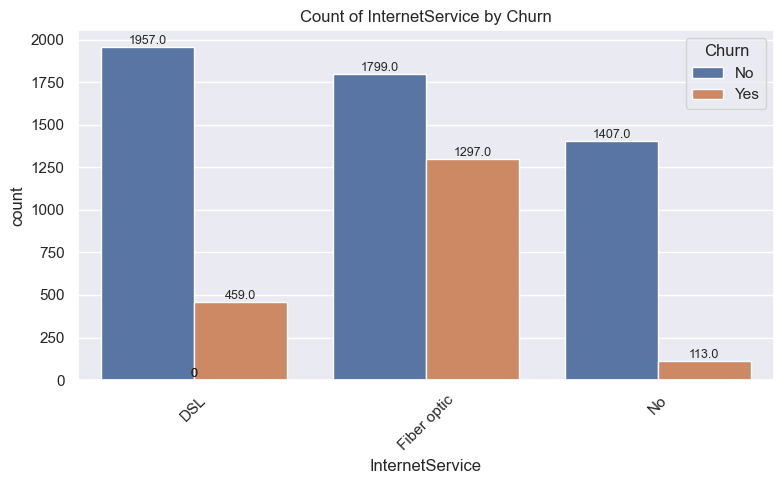

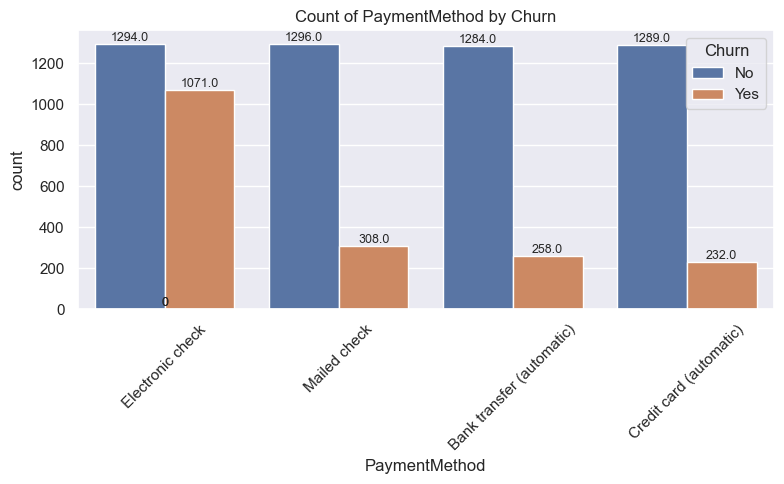

In [20]:
for col in ['Contract', 'InternetService', 'PaymentMethod']:
    plt.figure(figsize=(8, 5))
    ax = sns.countplot(x=col, hue='Churn', data=customer_churn)
    plt.xticks(rotation=45)
    
    # Add labels
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=9)
    
    plt.title(f'Count of {col} by Churn')
    plt.tight_layout()
    plt.show()

Text(0.5, 1.0, 'Tenure vs. Churn')

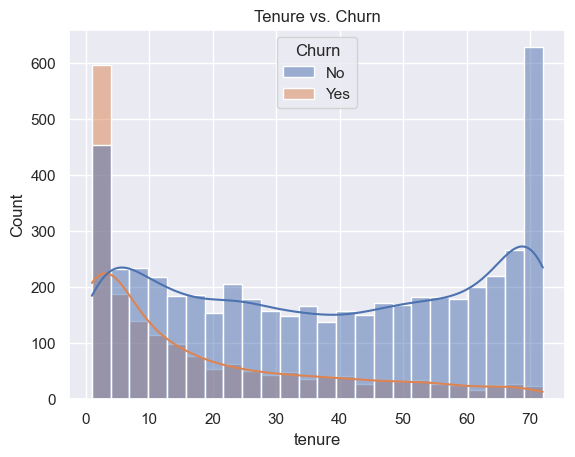

In [21]:
# Example: Tenure distribution by Churn
sns.histplot(data=customer_churn, x='tenure', hue='Churn', bins=24, kde=True)
plt.title('Tenure vs. Churn')

C:\Users\aksha\AppData\Local\Temp\ipykernel_45224\2070637033.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stack_data = customer_churn.groupby(['tenure_bin', 'Churn']).size().unstack()


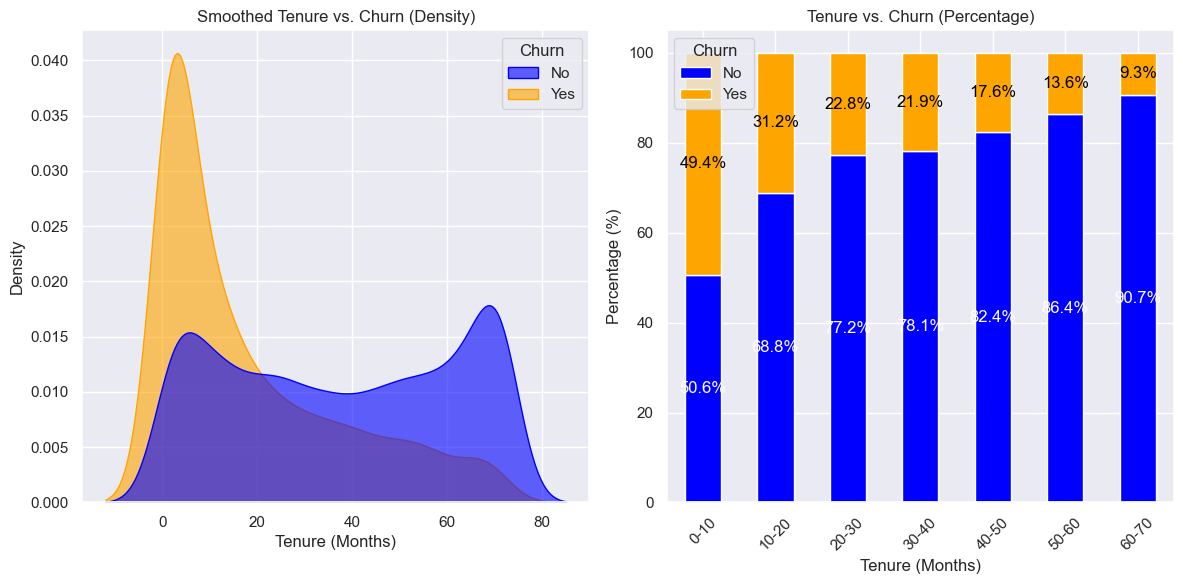

In [22]:

# Convert 'Churn' to numeric (1=Yes, 0=No)
customer_churn['Churn_numeric'] = customer_churn['Churn'].map({'Yes': 1, 'No': 0})

# Create figure
plt.figure(figsize=(12, 6))

# --- Plot 1: Smoothed KDE (Density Plot) ---
ax1 = plt.subplot(1, 2, 1)
sns.kdeplot(
    data=customer_churn, x='tenure', hue='Churn', 
    fill=True, alpha=0.6, common_norm=False, palette={'Yes': 'orange', 'No': 'blue'}
)
plt.title('Smoothed Tenure vs. Churn (Density)')
plt.xlabel('Tenure (Months)')
plt.ylabel('Density')

# --- Plot 2: Stacked Bar Plot with Percentages ---
ax2 = plt.subplot(1, 2, 2)

# Group data by tenure bins (e.g., 0-10, 10-20, ...)
customer_churn['tenure_bin'] = pd.cut(
    customer_churn['tenure'], 
    bins=np.arange(0, 80, 10), 
    labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70']
)

# Calculate percentages
stack_data = customer_churn.groupby(['tenure_bin', 'Churn']).size().unstack()
stack_data_perc = stack_data.div(stack_data.sum(axis=1), axis=0) * 100

# Plot stacked bars
stack_data_perc.plot(kind='bar', stacked=True, color=['blue', 'orange'], ax=ax2)
plt.title('Tenure vs. Churn (Percentage)')
plt.xlabel('Tenure (Months)')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)

# Add percentage labels
for i, (idx, row) in enumerate(stack_data_perc.iterrows()):
    no_pct, yes_pct = row['No'], row['Yes']
    ax2.text(i, no_pct/2, f'{no_pct:.1f}%', ha='center', va='center', color='white')
    ax2.text(i, no_pct + yes_pct/2, f'{yes_pct:.1f}%', ha='center', va='center', color='black')

plt.tight_layout()
plt.show()

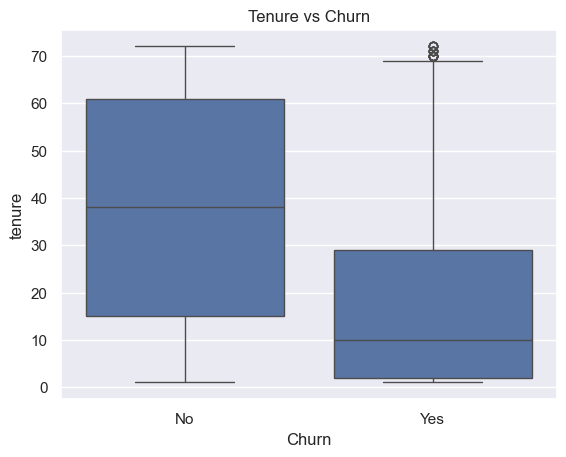

In [23]:
# Tenure vs. Churn
sns.boxplot(x='Churn', y='tenure', data=customer_churn)
plt.title("Tenure vs Churn")
plt.show()

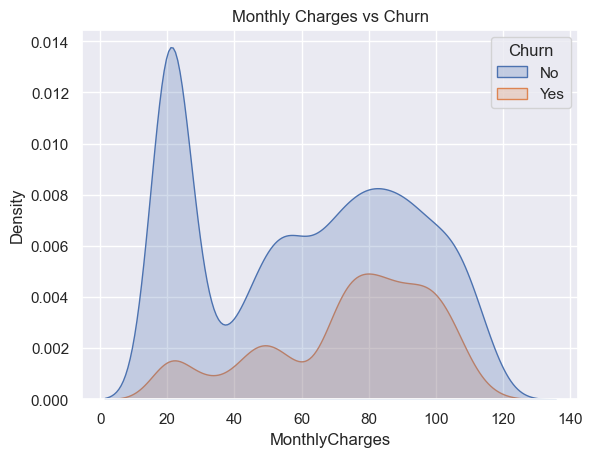

In [24]:
sns.kdeplot(data= customer_churn, x='MonthlyCharges', hue='Churn', fill=True)
plt.title("Monthly Charges vs Churn")
plt.show()

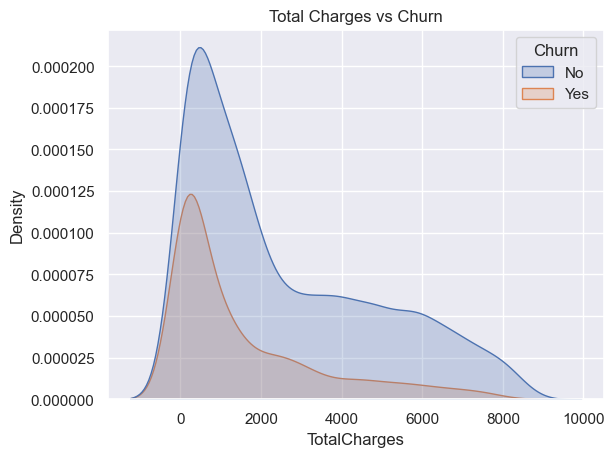

In [25]:
sns.kdeplot(data= customer_churn, x='TotalCharges', hue='Churn', fill=True)
plt.title("Total Charges vs Churn")
plt.show()

<Axes: >

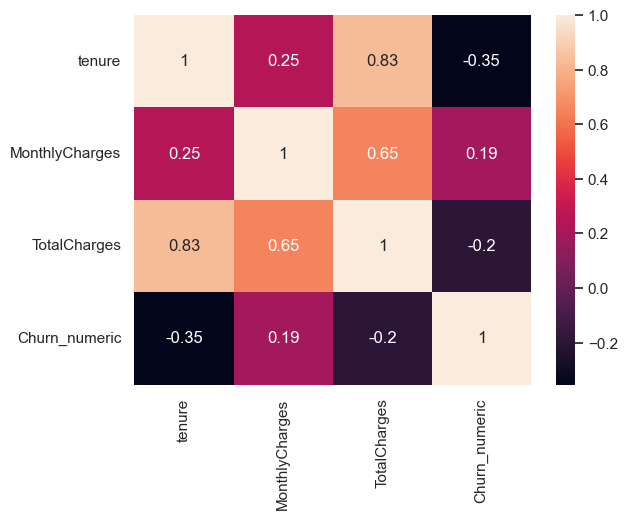

In [26]:
# Convert 'Churn' to numeric for correlation
customer_churn['Churn_numeric'] = customer_churn['Churn'].map({'Yes': 1, 'No': 0})
sns.heatmap(customer_churn[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn_numeric']].corr(), annot=True)

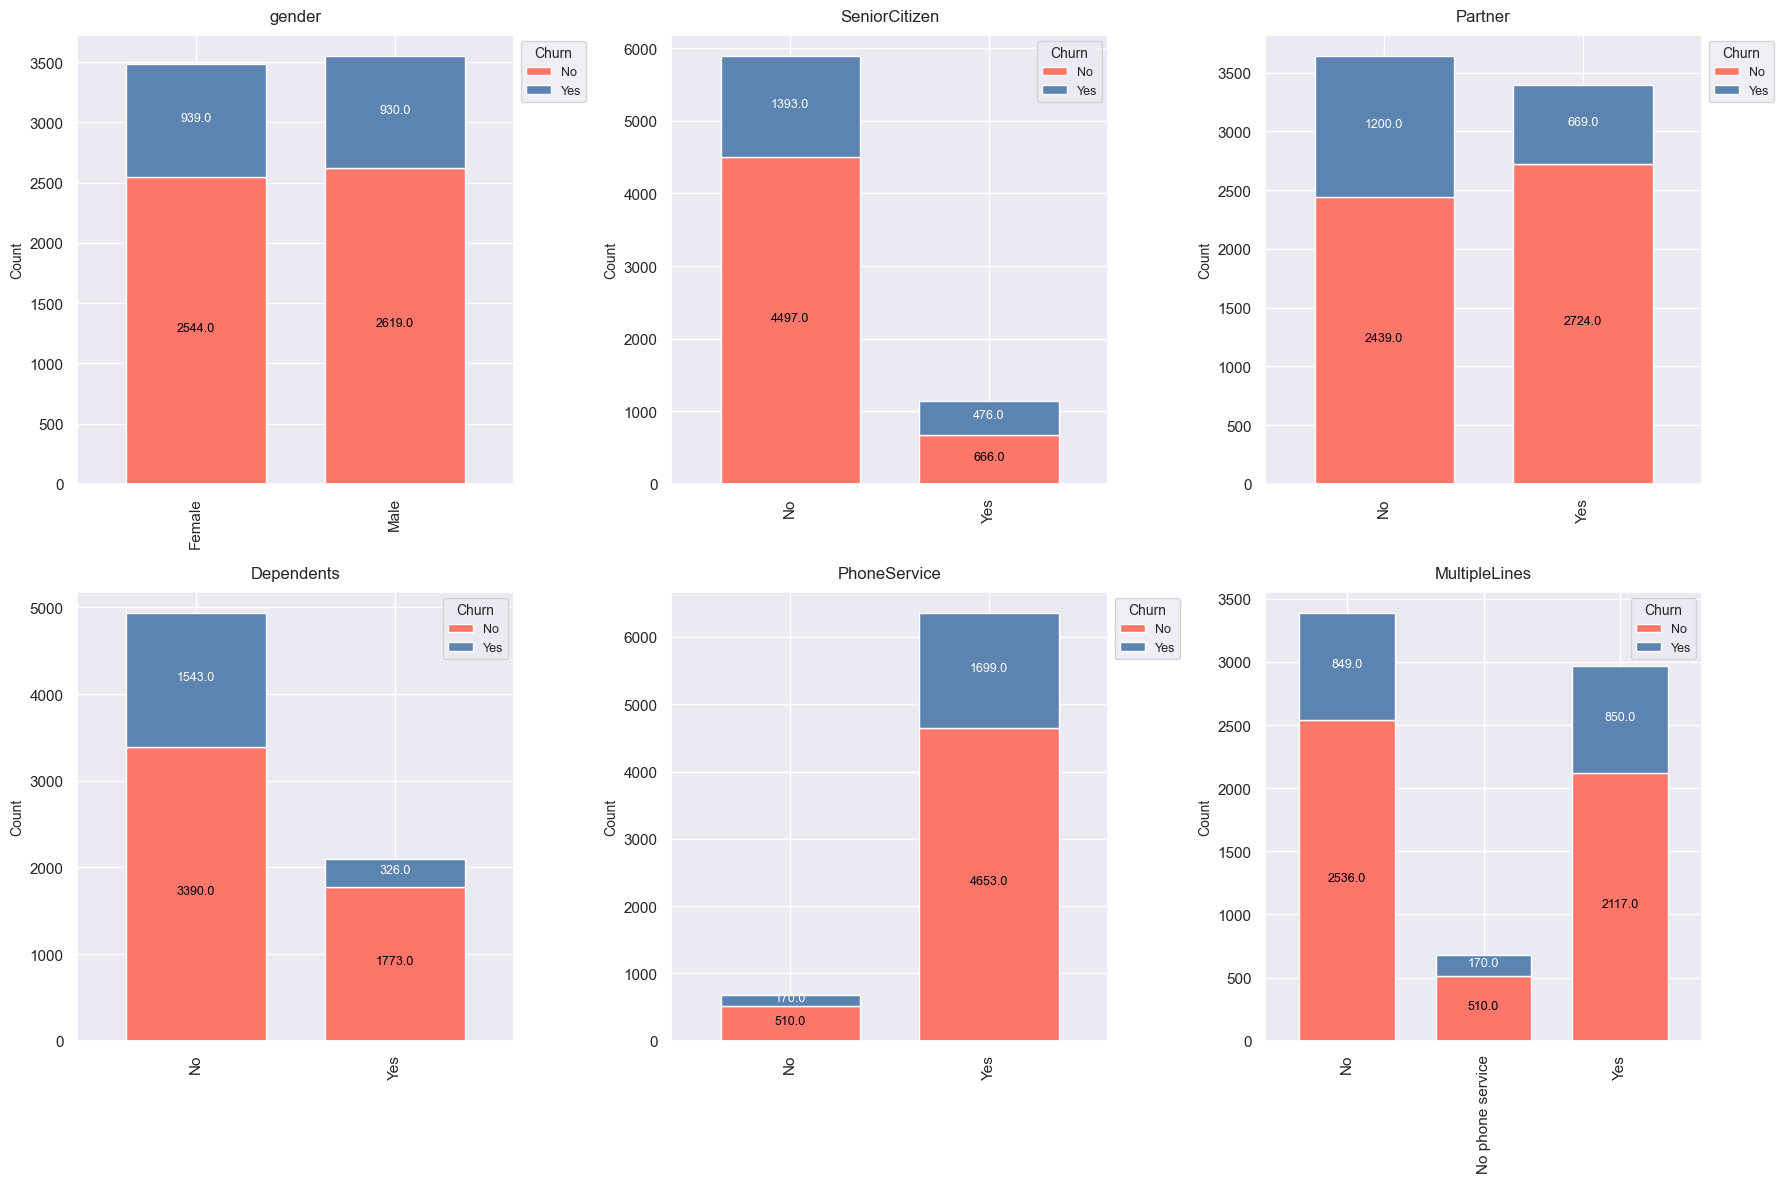

In [27]:
# List of categorical columns to plot
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines']

# Set up the plot grid
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # Increased height for label visibility
axes = axes.flatten()

# Define colors
colors = ['#FC766AFF', '#5B84B1FF']  # Churn=Yes, Churn=No

# Loop through each categorical variable
for i, col in enumerate(categorical_cols):
    ax = axes[i]
    # Create a crosstab of counts
    count_df = pd.crosstab(customer_churn[col], customer_churn['Churn'])
    
    # Plot as stacked bar chart
    bars = count_df.plot(kind='bar', stacked=True, ax=ax, color=colors, width=0.7)
    ax.set_title(col, fontsize=12, pad=10)
    ax.set_ylabel("Count", fontsize=10)
    ax.set_xlabel("")
    
    # Add data labels
    for container in ax.containers:
        # Calculate percentages if preferred (optional)
        total = count_df.sum(axis=1)
        percent = count_df[container.get_label()]/total*100
        labels = [f'{v}\n({p:.1f}%)' for v,p in zip(count_df[container.get_label()], percent)]
        
        # Simple count labels
        labels = [f'{v}' if v > 0 else '' for v in container.datavalues]
        ax.bar_label(container, labels=labels, 
                    label_type='center', 
                    color='white' if container.get_label() == 'Yes' else 'black',
                    fontsize=9,
                    padding=2)
    
    # Improve legend
    ax.legend(title="Churn", bbox_to_anchor=(1, 1), 
              title_fontsize=10, fontsize=9)

plt.tight_layout()
plt.show()

# Data Pre-Processing for Logistic Regression

As there is a big imbalance in dataset we will use library to solve that

In [28]:

binary_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
               'PhoneService', 'PaperlessBilling', 'Churn']
customer_churn[binary_cols] = customer_churn[binary_cols].replace({
    'Male': 1, 'Female': 0,
    'Yes': 1, 'No': 0
})


C:\Users\aksha\AppData\Local\Temp\ipykernel_45224\967867596.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  customer_churn[binary_cols] = customer_churn[binary_cols].replace({


In [29]:
# Converting multi-categorical variables into binary by encoding 

multi_cat_cols = [
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod'
]
customer_churn = pd.get_dummies(customer_churn, columns=multi_cat_cols, drop_first=True) # drop_first=True for regression models to avoid multicollinearity.

In [30]:
customer_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False


In [31]:
print(customer_churn.isnull().sum())

gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
Churn_numeric                              0
tenure_bin                               532
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineBackup_No internet service           0
OnlineBackup_Yes                           0
DeviceProtection_No internet service       0
DeviceProtection_Yes                       0
TechSuppor

In [32]:
print(customer_churn.select_dtypes(include=['object', 'category']).columns)

Index(['tenure_bin'], dtype='object')


In [33]:
customer_churn = pd.get_dummies(customer_churn, columns=['tenure_bin'], drop_first=True)

In [34]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7032 non-null   int64  
 1   SeniorCitizen                          7032 non-null   int64  
 2   Partner                                7032 non-null   int64  
 3   Dependents                             7032 non-null   int64  
 4   tenure                                 7032 non-null   int64  
 5   PhoneService                           7032 non-null   int64  
 6   PaperlessBilling                       7032 non-null   int64  
 7   MonthlyCharges                         7032 non-null   float64
 8   TotalCharges                           7032 non-null   float64
 9   Churn                                  7032 non-null   int64  
 10  Churn_numeric                          7032 non-null   int64  
 11  MultipleL

In [35]:
# Removing unwanted col
customer_churn.drop('Churn_numeric', axis=1, inplace=True)

In [36]:
# First splitting, then scale data
X = customer_churn.drop('Churn', axis=1)
y = customer_churn['Churn']

resamp = RandomOverSampler()
balX, baly = resamp.fit_resample(X,y)

# Split first
X_train, X_test, y_train, y_test = train_test_split(balX, baly, test_size=0.3, random_state=11)  # Reduced to 30% test

# Scale after splitting
scaler = StandardScaler()
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])  # Only transform test data



In [37]:

# Baseline
logreg = LogisticRegression(
    max_iter=1000,
    random_state=11
)
logreg.fit(X_train, y_train)

# Evaluate
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1]))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76      1513
           1       0.76      0.80      0.78      1585

    accuracy                           0.77      3098
   macro avg       0.77      0.77      0.77      3098
weighted avg       0.77      0.77      0.77      3098

ROC-AUC: 0.8535529094847807


In [38]:

rf = RandomForestClassifier(
    n_estimators=150,
    max_depth=10,           # Limit depth slightly
    min_samples_leaf=1,     # Mild regularization
    random_state=11
)
rf.fit(X_train, y_train)

# Feature Importance
pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False).head(10)

,Feature,Importance
4,tenure,0.169707
8,TotalCharges,0.140850
26,Contract_Two year,0.101649
7,MonthlyCharges,0.096487
11,InternetService_Fiber optic,0.084908
28,PaymentMethod_Electronic check,0.049508
25,Contract_One year,0.038291
14,OnlineSecurity_Yes,0.029230
20,TechSupport_Yes,0.023114
6,PaperlessBilling,0.017971


In [39]:

# Train
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)
y_probs = rf.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (Churn)

# Evaluate
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_probs))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.87      0.77      0.82      1513
           1       0.80      0.89      0.84      1585

    accuracy                           0.83      3098
   macro avg       0.83      0.83      0.83      3098
weighted avg       0.83      0.83      0.83      3098

ROC-AUC: 0.9037752725589578
Accuracy: 0.8298902517753389


In [40]:

cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='roc_auc')
print(f"CV ROC-AUC: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

CV ROC-AUC: 0.898 ± 0.005


In [41]:
# Testing ROC-AUC for both train and test data
train_probs = rf.predict_proba(X_train)[:, 1]
test_probs = rf.predict_proba(X_test)[:, 1]

print(f"Train ROC-AUC: {roc_auc_score(y_train, train_probs):.4f}")
print(f"Test ROC-AUC: {roc_auc_score(y_test, test_probs):.4f}")

Train ROC-AUC: 0.9490
Test ROC-AUC: 0.9038


In [42]:

cv_scores = cross_val_score(
    rf, 
    X_train, 
    y_train, 
    cv=5, 
    scoring='roc_auc'
)
print(f"CV ROC-AUC: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

CV ROC-AUC: 0.8983 ± 0.0051


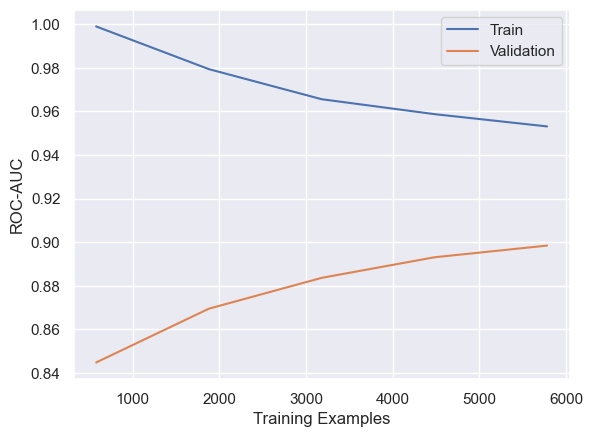

In [43]:
train_sizes, train_scores, test_scores = learning_curve(
    rf, X_train, y_train, cv=5,
    scoring='roc_auc', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5)
)

plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Train')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation')
plt.xlabel("Training Examples")
plt.ylabel("ROC-AUC")
plt.legend()
plt.show()

In [44]:
# Checking depths of first 5 trees
depths = [est.tree_.max_depth for est in rf.estimators_[:5]]
print(f"Tree depths: {depths}")

Tree depths: [10, 10, 10, 10, 10]


In [45]:
# Before/after regularization
pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False).head(5)

,Feature,Importance
4,tenure,0.169707
8,TotalCharges,0.140850
26,Contract_Two year,0.101649
7,MonthlyCharges,0.096487
11,InternetService_Fiber optic,0.084908


# Pickling the model file for deployment

In [46]:
import pickle

In [47]:
pickle.dump(rf,open('rfmodel.pkl','wb'))

In [48]:
pickled_model = pickle.load(open('rfmodel.pkl','rb'))

In [49]:
pickle.dump(scaler,open('scaling.pkl','wb'))